### Data Collection

In [17]:
!kaggle competitions download -c playground-series-s4e11

100%|██████████████████████████████████████| 4.55M/4.55M [00:02<00:00, 3.50MB/s]
100%|██████████████████████████████████████| 4.55M/4.55M [00:02<00:00, 2.21MB/s]


In [18]:
!unzip playground-series-s4e11.zip

Archive:  playground-series-s4e11.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


### Data Acuisition

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [238]:
df_train = pd.read_csv("train.csv")
df_train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [239]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [240]:
df_train.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [241]:
def number_column(df):
    for col in df:
        if df[col].dtype == 'int' or df[col].dtype == 'float':
            print(f"{col}: {df[col].unique()}")

number_column(df_train)

id: [     0      1      2 ... 140697 140698 140699]
Age: [49. 26. 33. 22. 30. 59. 47. 38. 24. 42. 55. 51. 39. 29. 50. 23. 56. 45.
 37. 46. 31. 19. 28. 25. 41. 60. 18. 36. 21. 58. 44. 43. 40. 35. 54. 27.
 52. 48. 57. 53. 34. 20. 32.]
Academic Pressure: [nan  5.  2.  3.  4.  1.]
Work Pressure: [ 5.  4. nan  1.  2.  3.]
CGPA: [    nan  8.97    5.9     7.03    5.59    8.13    5.7     9.54    8.04
  9.79    8.38    6.1     7.04    8.52    5.64    8.58    6.51    7.25
  7.83    9.93    8.74    6.73    5.57    8.59    7.1     6.08    5.74
  9.86    6.7     6.21    5.87    6.37    9.72    5.88    9.56    6.99
  5.24    9.21    7.85    6.95    5.86    7.92    9.66    8.94    9.71
  7.87    5.6     7.9     5.46    6.79    8.7     7.38    8.5     7.09
  9.82    8.89    7.94    9.11    6.75    7.53    9.49    9.01    7.64
  5.27    6.      9.44    5.75    7.51    9.05    6.38    8.95    9.88
  5.32    6.27    7.7     8.1     9.59    8.96    5.51    7.43    8.79
  9.95    5.37    6.86    8.32    9.

In [242]:
df_train.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [243]:
null = ['Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Financial Stress']

df_train1 = df_train[null].fillna(df_train[null].mean().round(2))

df_train1.head()

,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Financial Stress
0,3.14,5.0,7.66,2.94,2.00,2.0
1,3.14,4.0,7.66,2.94,3.00,3.0
2,5.00,3.0,8.97,2.00,2.97,1.0
3,3.14,5.0,7.66,2.94,1.00,1.0
4,3.14,1.0,7.66,2.94,1.00,4.0


In [244]:
df_train[null] = df_train1[null]

df_train.head()



,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,3.14,5.0,7.66,2.94,2.00,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.14,4.0,7.66,2.94,3.00,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.00,3.0,8.97,2.00,2.97,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.14,5.0,7.66,2.94,1.00,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.14,1.0,7.66,2.94,1.00,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


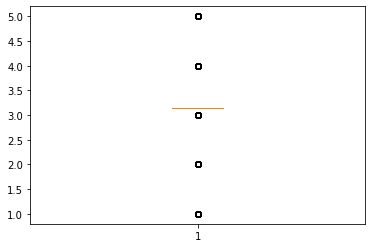

In [245]:
plt.boxplot(df_train['Academic Pressure'])
plt.show()

In [246]:
df_train.isnull().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               36630
Academic Pressure                            0
Work Pressure                                0
CGPA                                         0
Study Satisfaction                           0
Job Satisfaction                             0
Sleep Duration                               0
Dietary Habits                               4
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
Depression                                   0
dtype: int64

In [247]:
df_train =  df_train.astype({'Age': 'int', 'Academic Pressure':'int', 'Work Pressure':'int', 'Job Satisfaction':'int', 'Work/Study Hours':'int', 'Financial Stress':'int'})
df_train.dtypes

id                                         int64
Name                                      object
Gender                                    object
Age                                        int64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                          int64
Work Pressure                              int64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                           int64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                           int64
Financial Stress                           int64
Family History of Mental Illness          object
Depression                                 int64
dtype: object